# NLP Assignment #1
### by Prodromos Kampouridis

## A. Tokens, Types, Zipf's Law

### Import Libraries | Data

In [1]:
import nltk
import spacy
from transformers import BertTokenizer
import numpy as np
import random
import matplotlib.pyplot as plt


# load the file
with open('wsj_untokenized.txt', 'r') as f:
    text = f.read()

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


### Useful Functions

In [2]:
def print_top_tokens(tokens, tokenizer_name):
    # Create a dictionary to store the frequency of each token
    freq_dict = {}
    for token in tokens:
        freq_dict[token] = freq_dict.get(token, 0) + 1
    
    # Compute the probabilities and products
    probs = {token: freq_dict[token] / len(tokens) for token in set(tokens)}
    products = {token: (i+1) * probs[token] for i, token in enumerate(sorted(set(tokens), key=freq_dict.get, reverse=True))}

    # Sort the tokens by decreasing frequency
    sorted_tokens = sorted(set(tokens), key=freq_dict.get, reverse=True)

    # Print the top 20 with their counts, probabilities, and products
    print(f"Top 20 tokens with {tokenizer_name} tokenizer:")
    print("{:<10}{:<10}{:<10}{:<20}{:<20}".format("Rank", "Token", "Count", "Probability", "Rank*Probability"))
    for i, token in enumerate(sorted_tokens[:20]):
        count = freq_dict[token]
        prob = probs[token]
        prod = products[token]
        print("{:<10}{:<10}{:<10}{:<20.4f}{:<20.4f}".format((i+1), token, count, prob, prod))


def print_token_percentages(tokens, tokenizer_name):
    # Create a dictionary to store the frequency of each token
    freq_dict = {}
    for token in tokens:
        freq_dict[token] = freq_dict.get(token, 0) + 1

    # Compute the number of tokens that appear n times
    n_counts = {}
    for freq in freq_dict.values():
        if freq not in n_counts:
            n_counts[freq] = 1
        else:
            n_counts[freq] += 1

    num_types = len(freq_dict)
    # Compute the percentages and Zipf's law prediction
    for n in range(1, 4):
        if n in n_counts:
            perc = n_counts[n] / num_types * 100
        else:
            perc = 0
        zipf_perc = 1 / (n * (n + 1)) * 100
        print(f"Percentage of tokens that appear exactly {n} times with {tokenizer_name} tokenizer:", "{:.2f}% (Zipf's Law prediction: {:.2f}%)".format(perc, zipf_perc))



def zipfs_law_plot(tokens, tokenizer_name):
    # Create a dictionary to store the frequency of each token
    freq_dict = {}
    for token in tokens:
        freq_dict[token] = freq_dict.get(token, 0) + 1

    # Sort the tokens by frequency in descending order
    sorted_tokens = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

    # Compute the total number of tokens
    total_tokens = sum(freq_dict.values())

    # Compute the constant A for Zipf's Law
    best_A = None
    best_error = float('inf')
    for A in np.arange(0.1, 1.1, 0.1):
        error = sum([(i+1)*freq_dict*1.0/total_tokens - A for i, (token, freq_dict) in enumerate(sorted_tokens)])
        if abs(error) < best_error:
            best_A = A
            best_error = abs(error)

    # Compute the x and y values for the plot
    x = np.arange(1, len(sorted_tokens)+1)
    y1 = np.array([freq for token, freq in sorted_tokens])
    y2 = best_A / x

    # Plot the actual measurements and the predictions of Zipf's Law
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y1/total_tokens, c='blue', alpha=0.5, label='Actual')
    plt.plot(x, y2, c='red', alpha=0.8, label='Zipf\'s Law')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f'Zipf\'s Law (A={best_A})')
    plt.legend()
    plt.show()

### Applying Methods

### Using NLTK

#### Tokenization using nltk.word_tokenize()

In [3]:
tokens_nltk = nltk.word_tokenize(text)

### Answers

#### 1. Total number of tokens

In [4]:
print("Total number of tokens:", len(tokens_nltk))

Total number of tokens: 93530


#### 2. Number of unique tokens (types)

In [5]:
types_nltk = set(tokens_nltk)
print("Total number of types:", len(types_nltk))

Total number of types: 12000


#### 3. List of tokens for a random sentence

In [6]:
random_sentence = random.choice(nltk.sent_tokenize(text))
print("Random sentence:", random_sentence)
print("Tokens:", nltk.word_tokenize(random_sentence))

Random sentence: Reserves traded among commercial banks for overnight use in amounts of $1 million or more.
Tokens: ['Reserves', 'traded', 'among', 'commercial', 'banks', 'for', 'overnight', 'use', 'in', 'amounts', 'of', '$', '1', 'million', 'or', 'more', '.']


#### 4. Τable of top 20 most frequent tokens

In [6]:
print_top_tokens(tokens_nltk, 'NLTK')

Top 20 tokens with NLTK tokenizer:
Rank      Token     Count     Probability         Rank*Probability    
1         ,         4823      0.0516              0.0516              
2         the       4041      0.0432              0.0864              
3         .         3819      0.0408              0.1225              
4         of        2312      0.0247              0.0989              
5         to        2157      0.0231              0.1153              
6         a         1857      0.0199              0.1191              
7         in        1563      0.0167              0.1170              
8         and       1489      0.0159              0.1274              
9         ''        959       0.0103              0.0923              
10        's        863       0.0092              0.0923              
11        for       815       0.0087              0.0959              
12        that      807       0.0086              0.1035              
13        The       714       0.0076      

#### 5. Percentage of tokens that appear once, twice, and three times

In [7]:
print_token_percentages(tokens_nltk, 'NLTK')

Percentage of tokens that appear exactly 1 times with NLTK tokenizer: 52.12% (Zipf's Law prediction: 50.00%)
Percentage of tokens that appear exactly 2 times with NLTK tokenizer: 15.25% (Zipf's Law prediction: 16.67%)
Percentage of tokens that appear exactly 3 times with NLTK tokenizer: 7.52% (Zipf's Law prediction: 8.33%)


#### 6. Best value for constant A and the plot of Zipf's Law

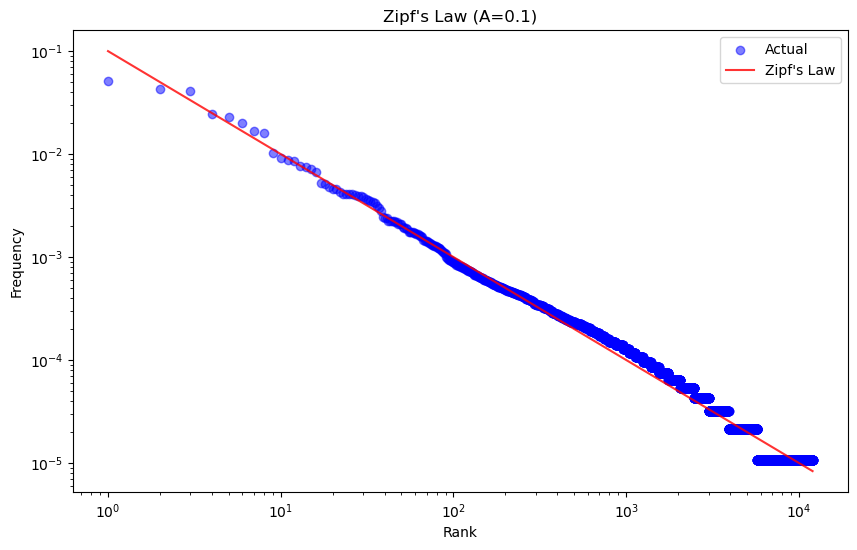

In [8]:
zipfs_law_plot(tokens_nltk, 'NLTK')

### Using spaCy

#### Load English language model

In [9]:
nlp = spacy.load('en_core_web_sm')

#### Tokenization using spaCy

In [10]:
doc = nlp(text)
tokens_spacy = [token.text for token in doc]

### Answers

#### 1. Total number of tokens

In [11]:
total_tokens = len(doc)
print("Total number of tokens:", total_tokens)

Total number of tokens: 95894


#### 2. Number of unique tokens (types)

In [12]:
types = set([token.text for token in doc])
num_types = len(types)
print("Total number of types:", num_types)

Total number of types: 11477


#### 3. List of tokens for a random sentence

In [14]:
random_sentence = np.random.choice(list(doc.sents))
print("Random sentence:", random_sentence.text)
print("Tokens:", [token.text for token in random_sentence])

Random sentence: New York-based POP Radio provides, through a national, in-store network, a customized music, information and advertising service which simulates live radio.
Tokens: ['New', 'York', '-', 'based', 'POP', 'Radio', 'provides', ',', 'through', 'a', 'national', ',', 'in', '-', 'store', 'network', ',', 'a', 'customized', 'music', ',', 'information', 'and', 'advertising', 'service', 'which', 'simulates', 'live', 'radio', '.']


C:\Users\makis\AppData\Local\Temp\ipykernel_596\2152263922.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  random_sentence = np.random.choice(list(doc.sents))


#### 4. Τable of top 20 most frequent tokens

In [13]:
print_top_tokens(tokens_spacy, 'spaCy')

Top 20 tokens with spaCy tokenizer:
Rank      Token     Count     Probability         Rank*Probability    
1         ,         4823      0.0503              0.0503              
2         the       4047      0.0422              0.0844              
3         .         3761      0.0392              0.1177              
4         of        2313      0.0241              0.0965              
5         to        2162      0.0225              0.1127              
6         a         1868      0.0195              0.1169              
7         in        1576      0.0164              0.1150              
8         and       1496      0.0156              0.1248              
9         ''        1372      0.0143              0.1288              
10        -         1231      0.0128              0.1284              
11        's        863       0.0090              0.0990              
12        for       815       0.0085              0.1020              
13        that      807       0.0084     

#### 5. Percentage of tokens that appear once, twice, and three times

In [14]:
print_token_percentages(tokens_spacy, "spaCy")

Percentage of tokens that appear exactly 1 times with spaCy tokenizer: 50.07% (Zipf's Law prediction: 50.00%)
Percentage of tokens that appear exactly 2 times with spaCy tokenizer: 15.60% (Zipf's Law prediction: 16.67%)
Percentage of tokens that appear exactly 3 times with spaCy tokenizer: 7.70% (Zipf's Law prediction: 8.33%)


#### 6. Best value for constant A and the plot of Zipf's Law

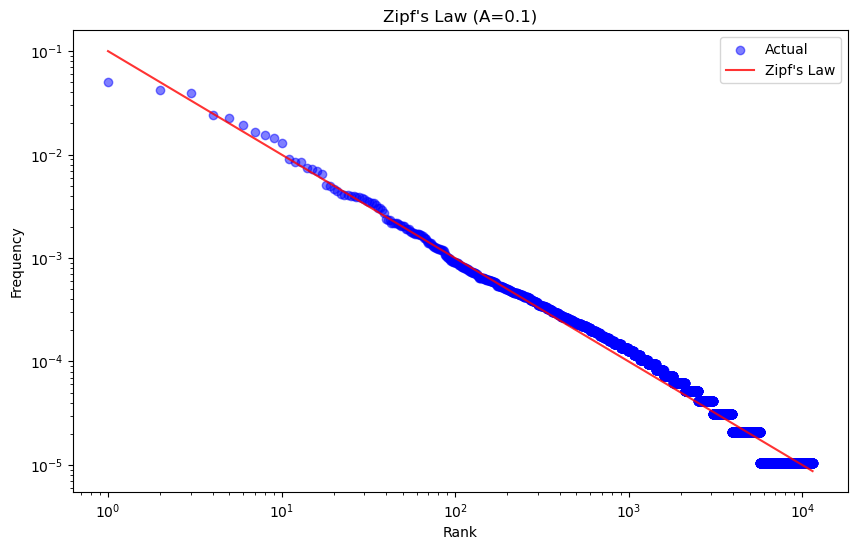

In [15]:
zipfs_law_plot(tokens_spacy, "spaCy")

### Using BertTokenizer

#### Tokenization using BertTokenizer

In [16]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
tokens_bert = tokenizer.tokenize(text)

### Answers

#### 1. Total number of tokens

In [17]:
print("Total number of tokens:", len(tokens_bert))

Total number of tokens: 112325


#### 2. Number of unique tokens (types)

In [18]:
types_bert = set(tokens_bert)
print("Total number of types:", len(types_bert))

Total number of types: 10266


#### 3. List of tokens for a random sentence

In [19]:
random_sentence = "Alan Spoon, recently named Newsweek president, said Newsweek's ad rates would increase 5% in January."
sentence_tokens = tokenizer.tokenize(random_sentence)
print("Random sentence:", random_sentence.strip())
print("Tokens:", sentence_tokens)

Random sentence: Alan Spoon, recently named Newsweek president, said Newsweek's ad rates would increase 5% in January.
Tokens: ['Alan', 'S', '##poon', ',', 'recently', 'named', 'News', '##week', 'president', ',', 'said', 'News', '##week', "'", 's', 'ad', 'rates', 'would', 'increase', '5', '%', 'in', 'January', '.']


#### 4. Τable of top 20 most frequent tokens

In [20]:
print_top_tokens(tokens_bert, 'BertTokenizer')

Top 20 tokens with BertTokenizer tokenizer:
Rank      Token     Count     Probability         Rank*Probability    
1         .         6363      0.0566              0.0566              
2         ,         5026      0.0447              0.0895              
3         '         4117      0.0367              0.1100              
4         the       4049      0.0360              0.1442              
5         of        2314      0.0206              0.1030              
6         to        2167      0.0193              0.1158              
7         a         1927      0.0172              0.1201              
8         -         1733      0.0154              0.1234              
9         in        1600      0.0142              0.1282              
10        and       1498      0.0133              0.1334              
11        s         932       0.0083              0.0913              
12        for       815       0.0073              0.0871              
13        that      807       0.0

#### 5. Percentage of tokens that appear once, twice, and three times

In [21]:
print_token_percentages(tokens_bert, 'BertTokenizer')

Percentage of tokens that appear exactly 1 times with BertTokenizer tokenizer: 37.51% (Zipf's Law prediction: 50.00%)
Percentage of tokens that appear exactly 2 times with BertTokenizer tokenizer: 16.79% (Zipf's Law prediction: 16.67%)
Percentage of tokens that appear exactly 3 times with BertTokenizer tokenizer: 9.24% (Zipf's Law prediction: 8.33%)


#### 6. Best value for constant A and the plot of Zipf's Law

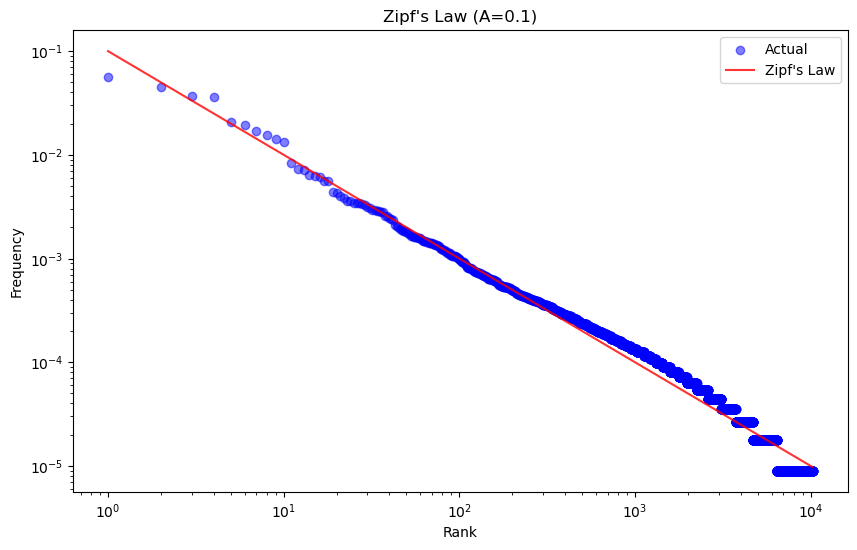

In [22]:
zipfs_law_plot(tokens_bert, 'BertTokenizer')

## B. N-gram Language Models

### Import Libraries | Data

In [2]:
import nltk
import math
import random
from nltk.corpus import treebank
from collections import Counter, defaultdict

nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\makis\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

###  Load Data

In [3]:
files = treebank.fileids()
train_files = files[:170]
test_files = files[170:]
train_data = [treebank.sents(f) for f in train_files]
train_data = [sent for file_sents in train_data for sent in file_sents]
test_data = [treebank.sents(f) for f in test_files]
test_data = [sent for file_sents in test_data for sent in file_sents]

### Answers

### 1. Perplexity comparison of the model’s performance on evaluation texts

#### Train an n-gram language model with add-k smoothing on the given training data

In [4]:
def train_ngram_lm(n, k, train_data):
    # Replace low frequency words with <UNK>
    word_counts = Counter([word for sent in train_data for word in sent])
    vocab = [word for word, count in word_counts.items() if count >= 3]
    train_data = [[word if word in vocab else '<UNK>' for word in sent] for sent in train_data]
    
    # Add <BOS> and <EOS> tokens to sentences
    train_data = [['<BOS>'] + sent + ['<EOS>'] for sent in train_data]
    
    # Count n-grams and (n-1)-grams
    ngrams = Counter([tuple(train_data[i][j:j+n]) for i in range(len(train_data)) for j in range(len(train_data[i])-n+1)])
    n_1_grams = Counter([tuple(train_data[i][j:j+n-1]) for i in range(len(train_data)) for j in range(len(train_data[i])-n+2)])
    
    # Compute probabilities
    V = len(vocab) + 1  # vocabulary size (including <UNK>)
    probs = defaultdict(dict)
    n_1_probs = Counter()
    for ngram in ngrams:
        n_1_gram = ngram[:-1]
        probs[n_1_gram][ngram[-1]] = (ngrams[ngram] + k) / (n_1_grams[n_1_gram] + k * V)
    for n_1_gram in n_1_grams:
        n_1_probs[n_1_gram] = k / (n_1_grams[n_1_gram] + k * V)
    
    return dict(probs), dict(n_1_probs)

#### Evaluate an n-gram language model with add-k smoothing on the given test data.

In [5]:
def evaluate_ngram_lm(n, k, lm_probs, lm_n_1_probs, test_data):
    # Replace out-of-vocabulary words with <UNK>
    vocab = list(set([ngram[i] for ngram in lm_probs.keys() for i in range(n-1)]))
    test_data = [[word if word in vocab else '<UNK>' for word in sent] for sent in test_data]
    
    # Add <BOS> and <EOS> tokens to sentences
    test_data = [['<BOS>'] + sent + ['<EOS>'] for sent in test_data]
    
    # Compute perplexity
    log_prob_sum = 0
    N = 0
    V = len(vocab) + 1  # vocabulary size (including <UNK>)
    for sent in test_data:
        for i in range(n-1, len(sent)):
            ngram = tuple(sent[i-n+1:i+1])
            n_1_gram = ngram[:-1]
            if n_1_gram in lm_probs and ngram[-1] in lm_probs[n_1_gram]:
                prob = lm_probs[n_1_gram][ngram[-1]]
            elif n_1_gram in lm_n_1_probs:
                prob = lm_n_1_probs[n_1_gram]
            else:
                prob = k / (k * V)

            log_prob_sum += math.log(prob)
            N += 1
    perplexity = math.exp(-log_prob_sum / N)
    
    return perplexity

#### Train and evaluate bigram and trigram models with add-k smoothing

In [6]:
for n, k in [(2, 1), (2, 0.01), (3, 1), (3, 0.01)]:
    lm_probs, lm_n_1_probs = train_ngram_lm(n=n, k=k, train_data=train_data)
    perplexity = evaluate_ngram_lm(n=n, k=k, lm_probs=lm_probs, lm_n_1_probs=lm_n_1_probs, test_data=test_data)
    print(f'{n}-gram model with add-{k} smoothing: Perplexity = {perplexity}')

2-gram model with add-1 smoothing: Perplexity = 383.5820326838452
2-gram model with add-0.01 smoothing: Perplexity = 137.82069673896206
3-gram model with add-1 smoothing: Perplexity = 1505.2134062916668
3-gram model with add-0.01 smoothing: Perplexity = 463.95391011414404


### 2. Perplexity comparison of the model’s performance on evaluation texts after lowercase conversion

#### Load data

In [7]:
files = treebank.fileids()
train_files = files[:170]
test_files = files[170:]
train_data = [treebank.sents(f) for f in train_files]
train_data = [sent for file_sents in train_data for sent in file_sents]
test_data = [treebank.sents(f) for f in test_files]
test_data = [sent for file_sents in test_data for sent in file_sents]

#### Convert all texts to lowercase

In [8]:
train_data = [[word.lower() for word in sent] for sent in train_data]
test_data = [[word.lower() for word in sent] for sent in test_data]

#### Train and evaluate bigram and trigram models with add-k smoothing

In [9]:
for n, k in [(2, 1), (2, 0.01), (3, 1), (3, 0.01)]:
    lm_probs, lm_n_1_probs = train_ngram_lm(n=n, k=k, train_data=train_data)
    perplexity = evaluate_ngram_lm(n=n, k=k, lm_probs=lm_probs, lm_n_1_probs=lm_n_1_probs, test_data=test_data)
    print(f'{n}-gram model with add-{k} smoothing: Perplexity = {perplexity}')

2-gram model with add-1 smoothing: Perplexity = 384.02866517960155
2-gram model with add-0.01 smoothing: Perplexity = 143.79890198095168
3-gram model with add-1 smoothing: Perplexity = 1471.1576654609312
3-gram model with add-0.01 smoothing: Perplexity = 461.92780100688117


### 3. Generating 3 new sentences using the n-gram model

In [10]:
def generate_sentence(n, lm_probs, starting_tokens=tuple(), max_len=1000):
    # Remove <UNK> from possible next tokens
    lm_probs = {k: {word: prob for word, prob in v.items() if word != "<UNK>"} for k, v in lm_probs.items()}
    # Remove (n-1)grams with no possible next (n) tokens
    lm_probs = {k: v for k, v in lm_probs.items() if v}
    sentence = ['<BOS>'] + list(starting_tokens)
    while sentence[-1] != '<EOS>' and len(sentence) <= max_len:
        ngram = tuple(sentence[-n+1:])
        if ngram in lm_probs:
            choices, probabilities = zip(*lm_probs[ngram].items())
            # Normalize the probabilities
            total_prob = sum(probabilities)
            probabilities = [p/total_prob for p in probabilities]
            word = random.choices(choices, weights=probabilities)[0]
            sentence.append(word)
        else:
            # If ngram not found, choose a random word from the vocabulary
            vocab = list(set([ngram[i] for ngram in lm_probs.keys() for i in range(n-1)]))
            word = random.choice(vocab)
            sentence.append(word)
    return ' '.join(sentence)

In [13]:
# Set seed to achieve reproducible text generation across multiple runs.
# random.seed(1) 

# Set seed to achieve reproducible text generation across multiple runs.
starting_tokens = ("there", "is") # Set optional starting tokens

# Set a maxumun number of token to generate, if <EOS> is not reached.
max_len = 1000

n = 2
k = 1
lm_probs, _ = train_ngram_lm(n=n, k=k, train_data=train_data)
print(f"\nGenerating sentences using {n}-gram model with add-{k} smoothing.\n")
for i in range(3):
    sentence = generate_sentence(n=n, lm_probs=lm_probs, starting_tokens=starting_tokens)
    print(sentence)

n = 2
k = 0.01
lm_probs, _ = train_ngram_lm(n=n, k=k, train_data=train_data)
print(f"\nGenerating sentences using {n}-gram model with add-{k} smoothing.\n")
for i in range(3):
    sentence = generate_sentence(n=n, lm_probs=lm_probs, starting_tokens=starting_tokens)
    print(sentence)

n = 3
k = 1
lm_probs, _ = train_ngram_lm(n=n, k=k, train_data=train_data)
print(f"\nGenerating sentences using {n}-gram model with add-{k} smoothing.\n")
for i in range(3):
    sentence = generate_sentence(n=n, lm_probs=lm_probs, starting_tokens=starting_tokens)
    print(sentence)

n = 3
k = 0.01
lm_probs, _ = train_ngram_lm(n=n, k=k, train_data=train_data)
print(f"\nGenerating sentences using {n}-gram model with add-{k} smoothing.\n")
for i in range(3):
    sentence = generate_sentence(n=n, lm_probs=lm_probs, starting_tokens=starting_tokens)
    print(sentence)


Generating sentences using 2-gram model with add-1 smoothing.

<BOS> there is finally some students can involve the dow jones industrial sector remains strong periods in iowa , yesterday *-1 most said 0 maybe he even in certain assets and thus more than a year they just one even more managers ' day , which they add it went up , and tokyo ltd. 's lead underwriter in savings institution the only hours . <EOS>
<BOS> there is taking their real-estate loan association 's ruling may set *-1 offering as chief executive office that nearly 1,500 alleged safety problems will face of 1989 as the other risk of 22 3\/4 . <EOS>
<BOS> there is interested in comments that retail investor continues *-1 in motor corp . <EOS>

Generating sentences using 2-gram model with add-0.01 smoothing.

<BOS> there is also has improved its hardware . <EOS>
<BOS> there is done *-1 in 1985 . <EOS>
<BOS> there is resulting company . <EOS>

Generating sentences using 3-gram model with add-1 smoothing.

<BOS> there is p